## Prodigy Internship By Mahalakshmi

## Task 2 - Titanic Dataset

Problem Statement: Perform data cleaning & exploratory data analysis (EDA) on a dataset of your choice,such as the Titanic dataset from Kaggle.Explore the relationships between variables & trends in data.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the Titanic dataset
titanic = pd.read_csv("Titanic.csv")

# Quick look at the first few rows of the dataset
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Data Cleaning

## Handling missing values

In [16]:
# Check for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# Handle missing values in Age and Embarked columns
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column due to too many missing values
titanic.drop('Cabin', axis=1, inplace=True)

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Data Type Conversion

In [19]:
# Convert data types 
titanic['Age'] = titanic['Age'].astype(int)
titanic['Fare'] = titanic['Fare'].astype(float)

## Feature Engineering

In [20]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# Create a new feature 'IsAlone' to indicate whether a passenger is traveling alone
titanic['IsAlone'] = (titanic['FamilySize'] == 0).astype(int)


## Exploratory data Analysis 


## 1.Univariate Analysis:


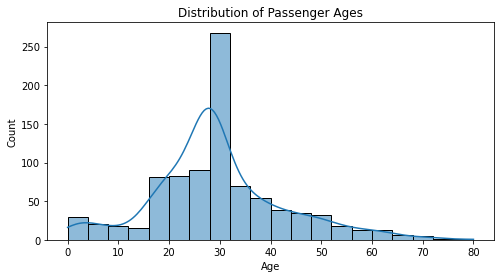

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(data=titanic, x='Age', bins=20, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.show()


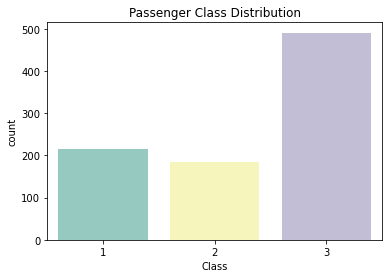

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x='Pclass', palette="Set3")
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.show()


## Bivariate Analysis


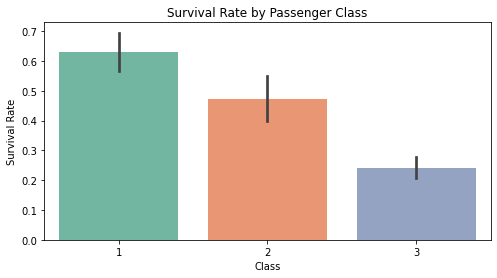

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(data=titanic, x='Pclass', y='Survived', palette="Set2")
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()


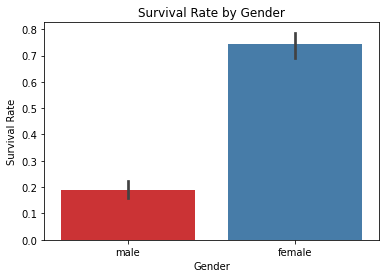

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(data=titanic, x='Sex', y='Survived', palette="Set1")
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


## Multivariate Analysis

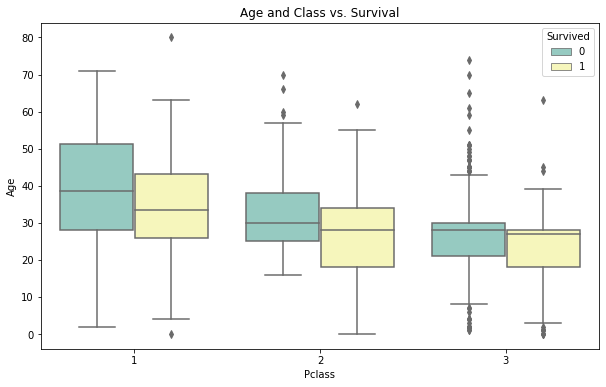

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x='Pclass', y='Age', hue='Survived', palette="Set3")
plt.title('Age and Class vs. Survival')
plt.show()


## Correlation Plot

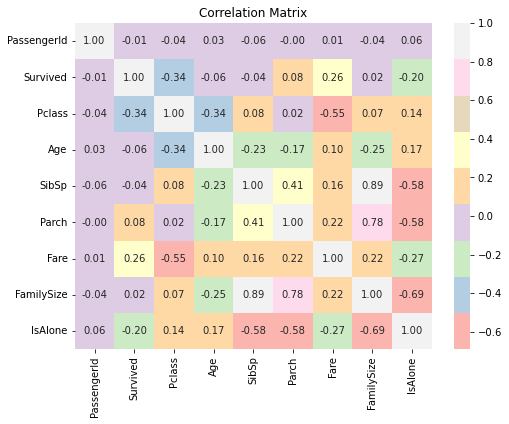

In [39]:
corr_matrix = titanic.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Pastel1", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [40]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,0.034322,-0.057527,-0.001652,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.064909,-0.035322,0.081629,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.339999,0.083081,0.018443,-0.549500,0.065997,0.135207
Age,0.034322,-0.064909,-0.339999,1.000000,-0.233066,-0.172745,0.096838,-0.245593,0.171807
SibSp,-0.057527,-0.035322,0.083081,-0.233066,1.000000,0.414838,0.159651,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.172745,0.414838,1.000000,0.216225,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.096838,0.159651,0.216225,1.000000,0.217138,-0.271832
FamilySize,-0.040143,0.016639,0.065997,-0.245593,0.890712,0.783111,0.217138,1.000000,-0.690922
IsAlone,0.057462,-0.203367,0.135207,0.171807,-0.584471,-0.583398,-0.271832,-0.690922,1.000000


## Pairplot

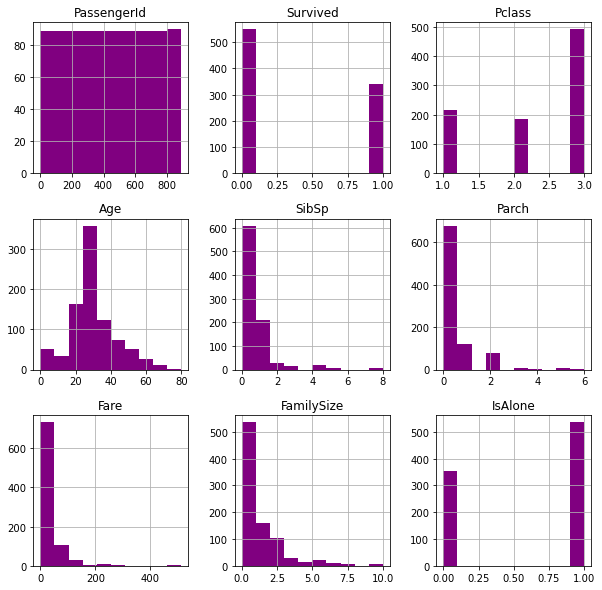

In [28]:
titanic.hist(figsize=(10, 10), color='#800080')
plt.show()


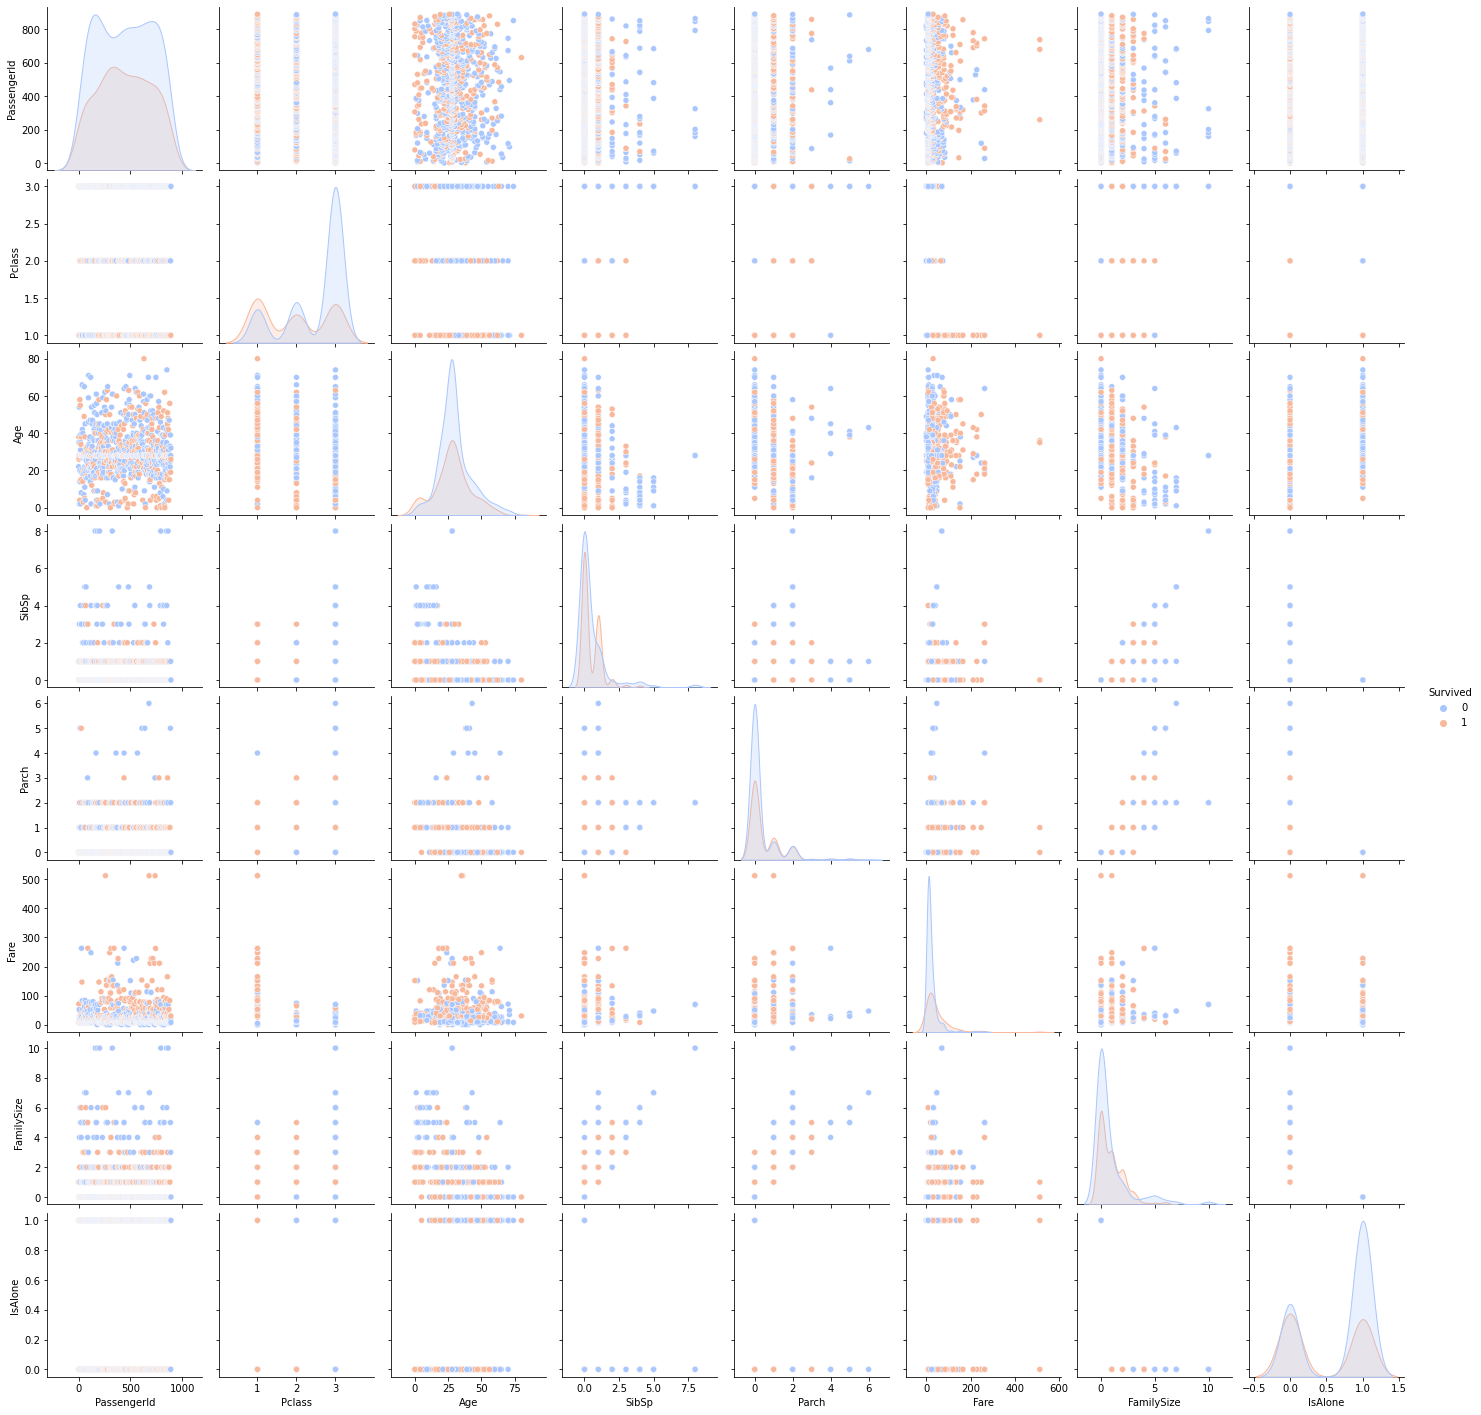

In [29]:
sns.pairplot(titanic, hue='Survived', palette='coolwarm')
plt.show()


## Conclusion

The sinking of the Titanic stands as a poignant and historically significant tragedy. Within the dataset provided, we find a wealth of features related to the passengers who embarked on this ill-fated voyage. These features encompass a range of information, including PassengerId, Survival status, Passenger Class (Pclass), Names, Gender (Sex), Age, Siblings/Spouses (SibSp), Parents/Children (Parch), Ticket information, Fare, Cabin details, and Port of Embarkation (Embarked). Through an analysis of these features, we gain valuable insights into various aspects of this historic event. These insights include understanding the survival rate of Titanic passengers, the influence of passenger class and embarkation location on survival rates, the distribution of passengers based on age and fare, gender-based survival rates, and the impact of traveling with siblings, spouses, parents, or children on passenger survival. This dataset serves as an excellent foundation for conducting in-depth Exploratory Data Analysis, offering a comprehensive view of the Titanic's tragic journey and the factors that played a role in passengers' survival.